<a href="https://colab.research.google.com/github/preeti13456/machine-learning-/blob/master/ProjectImp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [0]:
embedding_layer = layers.Embedding(1000, 5)

In [0]:
result = embedding_layer(tf.constant([1,2,3]))

In [0]:
print(result.numpy())

[[-0.01903666  0.01800349  0.0280831   0.03482168 -0.00250801]
 [ 0.03689012  0.04384783  0.03890053  0.01753645  0.03188804]
 [ 0.04553198  0.03206075  0.03227425 -0.0459173  -0.04927248]]


In [0]:
print(result.numpy().shape) #3 inputs in embedding of 5 layer

(3, 5)


In [0]:
tfds.text.imdb.IMDBReviews

tensorflow_datasets.text.imdb.IMDBReviews

In [0]:
tfds.text.imdb.IMDBReviewsConfig

tensorflow_datasets.text.imdb.IMDBReviewsConfig

In [0]:
def get_batch_data():
  (train_data, test_data), info = tfds.load(
'imdb_reviews/subwords8k',
split=(tfds.Split.TRAIN, tfds.Split.TEST),
with_info=True,
as_supervised=True
)
  encoder = info.features['text'].encoder
  print(encoder.subwords[:20])

  padded_shapes = ([None], ())
  train_batches = train_data.shuffle(1000).padded_batch(10,
                                                      padded_shapes = padded_shapes)
  test_batches = test_data.shuffle(1000).padded_batch(10,
                                                      padded_shapes = padded_shapes) 

  return train_batches, test_batches, encoder

def get_model(encoder, embedding):
  embedding_dim = 16
  model = keras.Sequential([
                          layers.Embedding(encoder.vocab_size, embedding_dim),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(1, activation='sigmoid')])
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['acc'])
  return model
    

def plot_data(history):
  history_dict = history.history
  acc = history_dict['acc']
  val_acc = history_dict['val_acc']
  epochs = range(1,len(acc)+1)

  plt.figure(figsize=(12,9))
  plt.plot(epochs, acc, 'bo', label='Training acc')

  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.ylim((0.5, 1))
  plt.show
  

def retrive_embeddings ():
  

In [0]:

(train_data, test_data), info = tfds.load(
'imdb_reviews/subwords8k',
split=(tfds.Split.TRAIN, tfds.Split.TEST),
with_info=True,
as_supervised=True
)

In [0]:
encoder = info.features['text'].encoder
print(encoder.subwords[:20])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_']


In [0]:
padded_shapes = ([None], ())

In [0]:
train_batches = train_data.shuffle(1000).padded_batch(10,
                                                      padded_shapes = padded_shapes)

In [0]:
test_batches = test_data.shuffle(1000).padded_batch(10,
                                                      padded_shapes = padded_shapes)

In [0]:
embedding_dim = 16
model = keras.Sequential([
                          layers.Embedding(encoder.vocab_size, embedding_dim),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(1, activation='sigmoid')])

In [0]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['acc'])

In [0]:
history = model.fit(train_batches, epochs=10, validation_data = test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 25s 10ms/step - loss: 0.6365 - acc: 0.6820 - val_loss: 0.5499 - val_acc: 0.7700
Epoch 2/10
2500/2500 [==============================] - 14s 6ms/step - loss: 0.4626 - acc: 0.8399 - val_loss: 0.3939 - val_acc: 0.8600
Epoch 3/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.3604 - acc: 0.8794 - val_loss: 0.3619 - val_acc: 0.8650
Epoch 4/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.3089 - acc: 0.8961 - val_loss: 0.3529 - val_acc: 0.8800
Epoch 5/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.2757 - acc: 0.9074 - val_loss: 0.3576 - val_acc: 0.8550
Epoch 6/10
2500/2500 [==============================] - 16s 7ms/step - loss: 0.2493 - acc: 0.9161 - val_loss: 0.2945 - val_acc: 0.8800
Epoch 7/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.2311 - acc: 0.9226 - val_loss: 0.3068 - val_acc: 0.8550
Epoch 8/10
2500/2500 [==============================] 

In [0]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1,len(acc)+1)

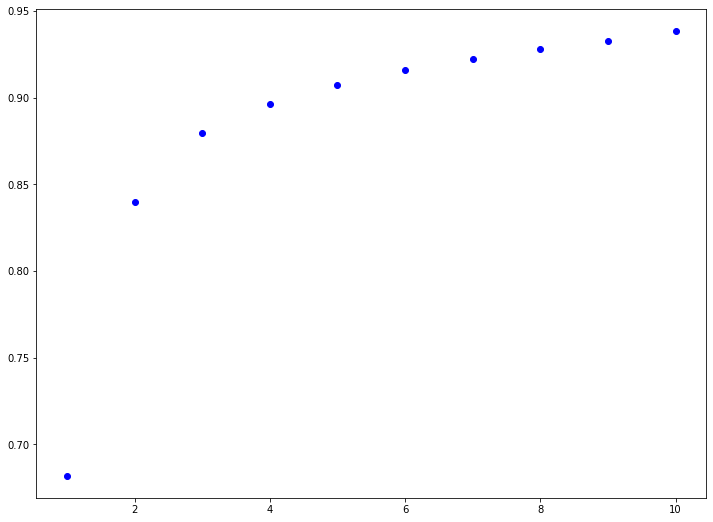

In [0]:
plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')

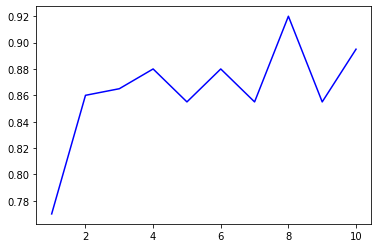

In [0]:
plt.plot(epochs, val_acc, 'b', label='Validation acc')

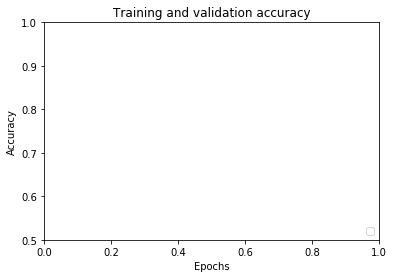

In [0]:
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5, 1))
plt.show()